<a href="https://colab.research.google.com/github/achiraporwal/Task_1-Spark_Foundation/blob/main/Spark_foundation_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GRIP : The Spark Foundation - Data Science and Business Analytics Intern**

# **Author : Achira Porwal**

**Task 1 : Predict The Percentage Of A Student Based On The No. Of Study Hours.**

**In the task it is required to predict the percentage of a student on the basis of number of hours students using the linear Regression supervised machine learning algorithm.**

**Steps:**


Step 1- Importing the dataset               
Step 2- Visualizing the dataset             
Step 3- Data Preparation                  
Step 4-Training the algorithm              
Step 5-Visualizing the model              
Step 6-Making predcitions                 
Step 7-Evaluting the model

**STEP 1- Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Reading data from remote link
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)

In [ ]:
# now let's observe the dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
# To find the number of columns and rows
df.shape

(25, 2)

In [ ]:
#To find more information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
# now we will check if our dataset contains null or missing values
df.isnull().sum() 

Hours     0
Scores    0
dtype: int64

As we can see we do not have any null values in our dataset so we can now move on to our next step.

**STEP 2- Visualizing the dataset**

In this we will plot the dataset to check whether we can observe any realtion between the two varibles or not.

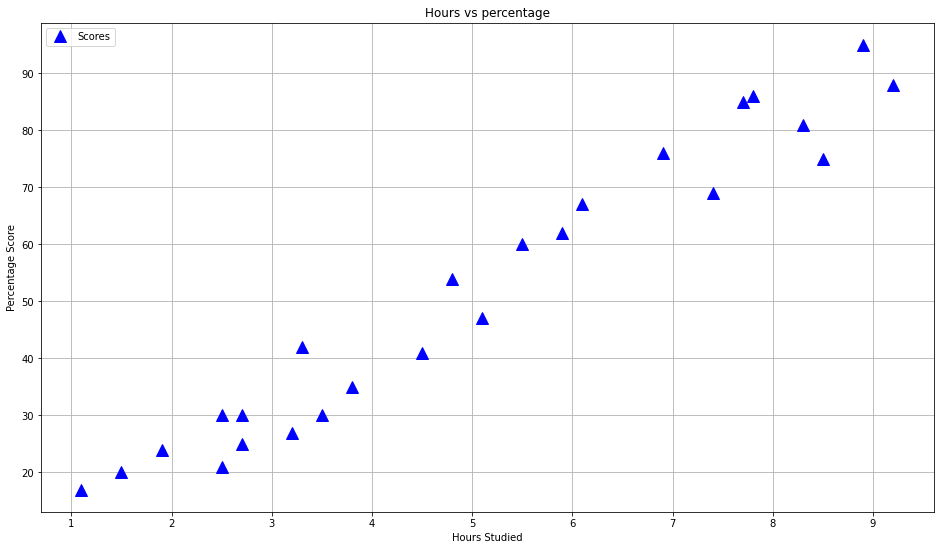

In [ ]:
# Plotting the dataset
plt.rcParams["figure.figsize"] = [16,9]
df.plot(x='Hours', y='Scores', style='^', color='blue', markersize=12)
plt.title('Hours vs percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

From the graph above, we can observe that there is a linear realtionship between "hours studied" and "percentage score". so, we cand use the linear regression supervised machine model on it to predict further values.

In [ ]:
# we can also use .corr to determine the corelation between the variables
df.corr() 

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**STEP 3- Data preparation**

In this step we will divide the data info "features" (inputs) and "labels" (output). After that we will split the whole dataset into 2 parts- testing data and training data.

In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
# using iloc function we will divide the data
X = df.iloc[:, :1].values
Y = df.iloc[:, 1:].values

In [ ]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [ ]:
print(Y)

[[21]
 [47]
 [27]
 [75]
 [30]
 [20]
 [88]
 [60]
 [81]
 [25]
 [85]
 [62]
 [41]
 [42]
 [17]
 [95]
 [30]
 [24]
 [67]
 [69]
 [30]
 [54]
 [35]
 [76]
 [86]]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


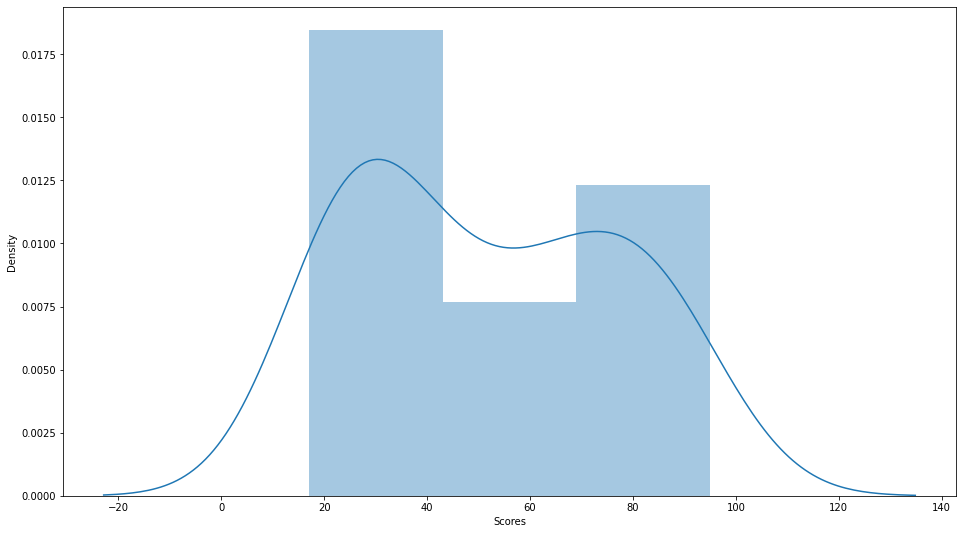

In [ ]:
# Splitting data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.2, random_state=0)
sns.distplot(df["Scores"])
plt.show()

**STEP 4-Training the Algorithm**

We have splited our data into training and testing sets, and now we will train our model.

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**STEP 5-Visualizing the model**

After training the model, now its time to visualize it. 

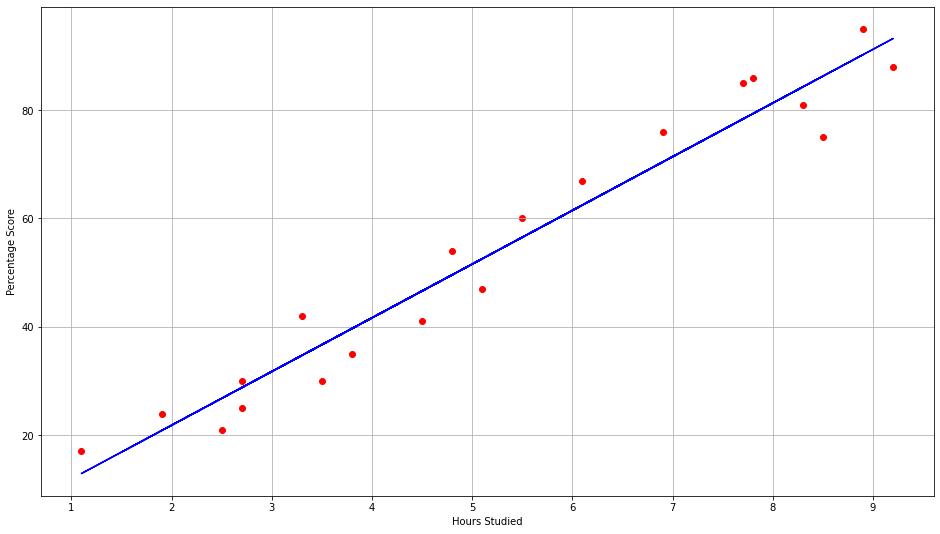

In [ ]:
line = model.coef_*X + model.intercept_

# Plotting for the training data
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(X_train, Y_train, color='red')
plt.plot(X, line, color='blue');
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

**STEP 6- Making Predictions**

Now that we have trained our algorithm, it's time to make some predictions.

In [ ]:
# Testing data - In Hours
print(X_test)
# predicting the scores
Y_pred = model.predict(X_test)
print(Y_test)
print(Y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[[20]
 [27]
 [69]
 [30]
 [62]]
[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


In [ ]:
# Comparing Actual vs Predicted
comp = pd.DataFrame({ 'Actual': [Y_test]})
comp1 = pd.DataFrame({ 'Predicted':[Y_pred]})
print(comp)
print(comp1)

                           Actual
0  [[20], [27], [69], [30], [62]]
                                           Predicted
0  [[16.884144762398023], [33.732260779489835], [...


In [ ]:
# Testing with your own data
hours= 9.25
own_pred = model.predict([[hours]])
print("The predicted score if a person studies for ",hours, "hours is",own_pred[0])

The predicted score if a person studies for  9.25 hours is [93.69173249]


Hence, it can be concluded that the predicted score if a person studies for  9.25 hours is 93.69173249

**STEP 7- Evaluating the model**

In the last step, we are going to evaluate our trained model by calculating mean absolute error

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:' , metrics.mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error: 4.183859899002982
